In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KN


In [4]:
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
labels = df.iloc[:,9]
features = df.drop(["Type"],axis=1)

In [8]:
# Normalize the function
def norm_func(i):
    x = (i-i.min()/i.max()-i.min())
    return(x)
data = norm_func(features)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2)

In [10]:
model = KN(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
train_acc = np.mean(model.predict(x_train)==y_train)
train_acc

0.8128654970760234

In [13]:
test_acc = np.mean(model.predict(x_test)==y_test)
test_acc

0.6744186046511628

In [15]:
model = KN(n_neighbors=4)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
train_acc = np.mean(model.predict(x_train)==y_train)
test_acc = np.mean(model.predict(x_test)==y_test)
acc=[]

In [19]:
for i in range(4,50,2):
    model = KN(n_neighbors=i)
    model.fit(x_train,y_train)
    train_acc = np.mean(model.predict(x_train)==y_train)
    test_acc = np.mean(model.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])

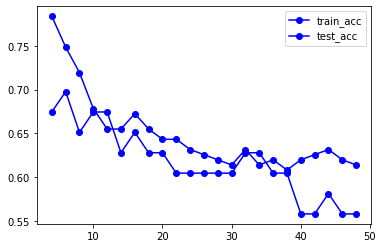

In [21]:
plt.plot(np.arange(4,50,2),[i[0] for i in acc],"bo-")
plt.plot(np.arange(4,50,2),[i[1] for i in acc],"bo-")
plt.legend(["train_acc","test_acc"])

In [22]:
model = KN(n_neighbors=13)
model.fit(x_train,y_train)
train_acc = np.mean(model.predict(x_train)==y_train)
train_acc

0.6549707602339181

In [23]:
test_acc = np.mean(model.predict(x_test)==y_test)
test_acc

0.6511627906976745